In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from  matplotlib.colors import ListedColormap,BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import geopandas as gpd
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings("ignore")

D:\Anaconda-DATA\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
track = pd.read_excel("D:/PAPERBANJIR/EXCEL PROPERTI/raw14_00_16_12.xlsx", sheet_name="filter")

In [3]:
def create_polygon(df):
    polygons = []
    for _, row in df.iterrows():
        if isinstance(row['geometry'], str):
            coords = [tuple(map(float, point.split())) for point in row['geometry'].split(',')]
            polygon = Polygon(coords)
            polygons.append(polygon)
    return polygons

In [4]:
#specific

id_42 = track[track['mcs_id'] == 42]
id_70 = track[track['mcs_id'] == 70]
id_95 = track[track['mcs_id'] == 95]
id_107 = track[track['mcs_id'] == 107]

#initiate for track

id_42['geometry'] = create_polygon(id_42)
id_70['geometry'] = create_polygon(id_70)
id_95['geometry'] = create_polygon(id_95)
id_107['geometry'] = create_polygon(id_107)


# Convert to GeoDataFrames and assign EPSG:4326 CRS
gdf_42 = gpd.GeoDataFrame(id_42, geometry=id_42['geometry'], crs="EPSG:4326")
gdf_70 = gpd.GeoDataFrame(id_70, geometry=id_70['geometry'], crs="EPSG:4326")
gdf_95 = gpd.GeoDataFrame(id_95, geometry=id_95['geometry'], crs="EPSG:4326")
gdf_107 = gpd.GeoDataFrame(id_107, geometry=id_107['geometry'], crs="EPSG:4326")

In [5]:
#find centroid
gdf_42['centroid'] = gdf_42['geometry'].centroid
gdf_70['centroid'] = gdf_70['geometry'].centroid
gdf_95['centroid'] = gdf_95['geometry'].centroid
gdf_107['centroid'] = gdf_107['geometry'].centroid

#extract the x, y for centroid
gdf_42['centroid_x'] = gdf_42['centroid'].x
gdf_42['centroid_y'] = gdf_42['centroid'].y

gdf_70['centroid_x'] = gdf_70['centroid'].x
gdf_70['centroid_y'] = gdf_70['centroid'].y

gdf_95['centroid_x'] = gdf_95['centroid'].x
gdf_95['centroid_y'] = gdf_95['centroid'].y

gdf_107['centroid_x'] = gdf_107['centroid'].x
gdf_107['centroid_y'] = gdf_107['centroid'].y

In [6]:
path = r'D:\PAPERBANJIR\GRads\NCHMW\14_16_HMW8.nc'
cloud = xr.open_dataset(path)

c = cloud['t1']/100
c = c.sel(lon=slice(94, 119), lat=slice(-9, 8))

jalur = r'D:\PAPERBANJIR\GRads\20170710_20170720.nc'
rain = xr.open_dataset(jalur)

r = rain['precip']
r = r.sel(lon=slice(94, 119), lat=slice(10, -10))

In [8]:
SP = 32
SPI = gdf_95.geometry[SP]
x = gdf_95.centroid_x[SP]
y = gdf_95.centroid_y[SP]

input_cloud = c.sel(time='2017-07-15T15')

In [95]:
gdf_42

,geometry,time,itime,dtime,mcs_id,mcs_class,number,area(km2),eccentricity,mean_pr,Unnamed: 10,centroid,centroid_x,centroid_y
0,"POLYGON ((102.95000 -4.50535, 105.65000 -4.387...",2017-07-14 12:00:00,12,0.041667,42,CCC,0,470022.764112,0.877902,NaN,NaN,POINT (106.59108 -0.78887),106.591083,-0.788873
1,"POLYGON ((103.05000 -4.90759, 105.45000 -4.543...",2017-07-14 13:00:00,13,0.041667,42,CCC,1,477128.708259,0.896562,NaN,NaN,POINT (106.48652 -0.92919),106.486516,-0.929191
2,"POLYGON ((104.75000 -5.08358, 104.85000 -5.064...",2017-07-14 14:00:00,14,0.041667,42,CCC,2,442479.517444,0.877420,NaN,NaN,POINT (106.86516 -0.85443),106.865161,-0.854434
3,"POLYGON ((104.55000 -5.06168, 106.05000 -4.559...",2017-07-14 15:00:00,15,0.041667,42,CCC,3,499040.044995,0.889299,NaN,NaN,POINT (107.09715 -0.84390),107.097146,-0.843904
4,"POLYGON ((105.75000 -4.85553, 105.75000 -4.855...",2017-07-14 16:00:00,16,0.041667,42,CCC,4,583854.500263,0.858723,NaN,NaN,POINT (107.96454 -0.37230),107.964538,-0.372300
5,"POLYGON ((104.95000 -5.13660, 106.85000 -4.168...",2017-07-14 17:00:00,17,0.041667,42,CCC,5,458575.958679,0.932723,NaN,NaN,POINT (108.20221 -0.63556),108.202206,-0.635563
6,"POLYGON ((104.75000 -5.37041, 108.35000 -4.690...",2017-07-14 18:00:00,18,0.041667,42,CCC,6,631539.555692,0.745708,NaN,NaN,POINT (107.82396 -1.00285),107.823962,-1.002848
7,"POLYGON ((109.55000 -0.82440, 109.55000 -0.824...",2017-07-14 19:00:00,19,0.041667,42,CCC,7,226794.141709,0.911762,NaN,NaN,POINT (109.46818 1.07457),109.468183,1.074566
8,"POLYGON ((104.05000 -7.07708, 107.95000 -4.638...",2017-07-14 19:00:00,19,0.041667,42,CCC,8,338043.475809,0.729589,NaN,NaN,POINT (105.75282 -3.23844),105.752819,-3.238442
9,"POLYGON ((110.15000 -0.98708, 110.45000 -0.961...",2017-07-14 20:00:00,20,0.041667,42,CCC,9,156634.832044,0.802540,NaN,NaN,POINT (109.94298 1.03815),109.942982,1.038148


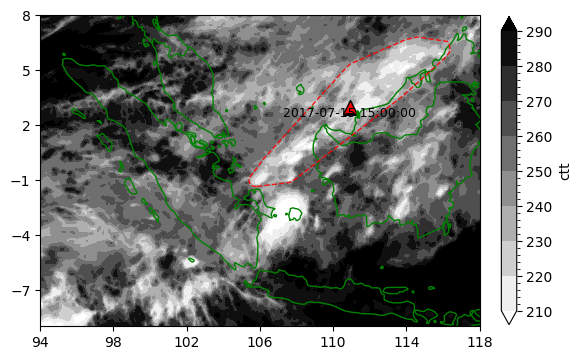

In [10]:
plt.figure(figsize=(7, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([94, 118, -9, 8], crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(94, 119, 4), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(8, -9, -3), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='g')
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='g')

cmap = plt.get_cmap('binary')
colors = [cmap(i) for i in range(cmap.N)]
for i in range(int(0.4 * cmap.N), int(0.6 * cmap.N)):
    colors[i] = (1.0, 1.0, 1.0, 1.0)  # White color

custom_cmap = ListedColormap(colors)
clevs = np.arange(210, 300, 10)

contour = ax.contourf(c.lon, c.lat, input_cloud, cmap=cmap, levels=clevs, extend='both', transform=ccrs.PlateCarree())
ax.add_geometries([SPI], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=1, linestyle='--', alpha=0.9)
ax.text(x, y, f'{gdf_95.time[SP]}', color='black', fontsize=9, va='top', ha='center', transform=ccrs.PlateCarree())
ax.scatter(x, y, color='red', marker='^', edgecolor='k', s=100, transform=ccrs.PlateCarree())

cbar = plt.colorbar(contour, orientation='vertical', label='ctt', pad=0.04, shrink=0.5)
cbar.minorticks_on()

In [54]:
gdf_70

,geometry,time,itime,dtime,mcs_id,mcs_class,number,area(km2),eccentricity,mean_pr,Unnamed: 10,centroid,centroid_x,centroid_y
12,"POLYGON ((95.31206 -8.95000, 97.35771 -8.95000...",2017-07-14 21:00:00,21,0.041667,70,CCC,12,9.574655e+05,0.871447,NaN,COMBINED!,POINT (103.22949 -4.94444),103.229487,-4.944435
14,"POLYGON ((95.12626 -8.95000, 97.16064 -8.95000...",2017-07-14 22:00:00,22,0.041667,70,CCC,14,9.437765e+05,0.928116,NaN,NaN,POINT (103.50492 -4.92850),103.504920,-4.928499
16,"POLYGON ((95.22304 -8.95000, 96.73296 -8.95000...",2017-07-14 23:00:00,23,0.041667,70,CCC,16,1.129220e+06,0.908175,NaN,NaN,POINT (103.00450 -4.81906),103.004499,-4.819065
17,"POLYGON ((95.34126 -8.95000, 96.70411 -8.95000...",2017-07-15 00:00:00,24,0.041667,70,CCC,17,1.132164e+06,0.871210,NaN,NaN,POINT (103.14935 -4.93411),103.149349,-4.934110
18,"POLYGON ((99.72960 -8.95000, 100.25419 -8.9500...",2017-07-15 01:00:00,25,0.041667,70,CCC,18,1.015061e+06,0.824994,NaN,NaN,POINT (103.62255 -4.68998),103.622553,-4.689981
19,"POLYGON ((96.45000 -8.15006, 100.35000 -8.0939...",2017-07-15 02:00:00,26,0.041667,70,CCC,19,1.046461e+06,0.854764,NaN,NaN,POINT (103.09673 -4.51991),103.096733,-4.519913
20,"POLYGON ((99.95000 -8.58750, 102.25000 -8.3239...",2017-07-15 03:00:00,27,0.041667,70,CCC,20,9.289084e+05,0.906578,NaN,NaN,POINT (102.94784 -5.02985),102.947843,-5.029853
21,"POLYGON ((96.25000 -8.87197, 101.95000 -8.7540...",2017-07-15 04:00:00,28,0.041667,70,CCC,21,9.638571e+05,0.860911,NaN,NaN,POINT (102.63711 -5.25437),102.637107,-5.254369
22,"POLYGON ((95.49060 -8.95000, 96.18673 -8.95000...",2017-07-15 05:00:00,29,0.041667,70,CCC,22,9.973643e+05,0.828840,NaN,NaN,POINT (102.36043 -5.13538),102.360433,-5.135379
23,"POLYGON ((94.50397 -8.95000, 97.50839 -8.95000...",2017-07-15 06:00:00,30,0.041667,70,CCC,23,9.740319e+05,0.867231,NaN,NaN,POINT (102.17485 -5.16748),102.174853,-5.167480


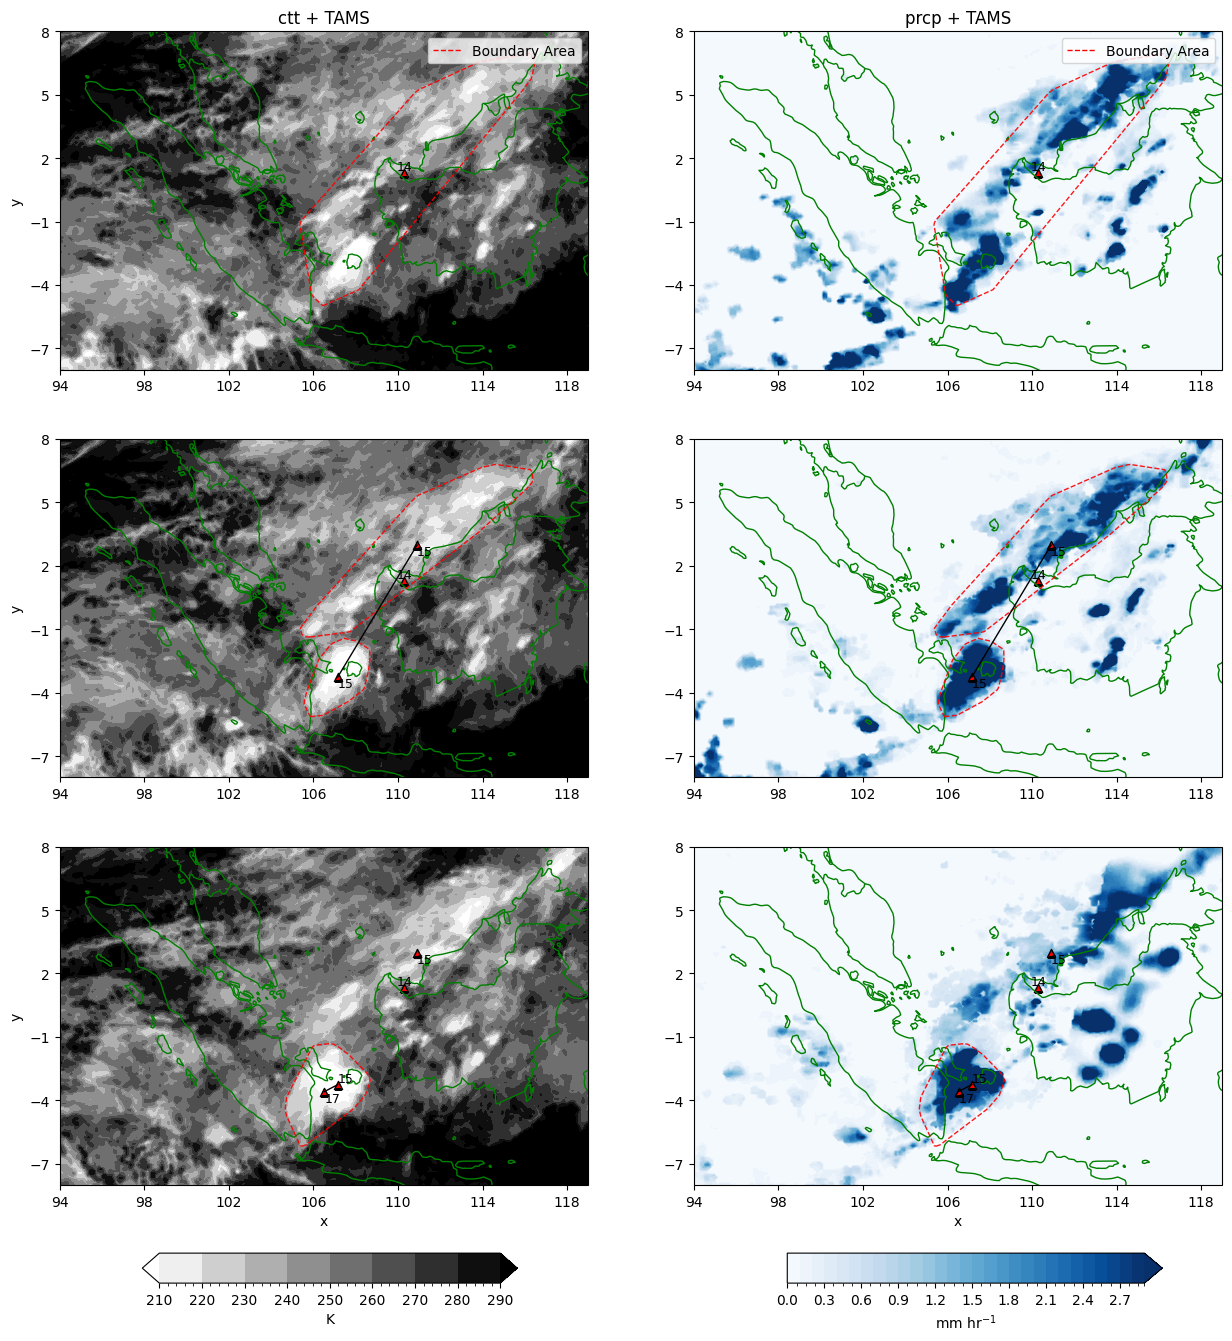

In [12]:
fig, axes = plt.subplots(3, 2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 15))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_extent([94, 119, -8, 8], crs=ccrs.PlateCarree())
    ax.set_xticks(np.arange(94, 119, 4), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(8, -9, -3), crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='g')
    ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='g')

range_cloud = np.arange(210,300,10)
range_rain = np.arange(0,3, 0.1)

ax1.contourf(c.lon, c.lat, c.sel(time='2017-07-15T14'), cmap=plt.cm.binary, levels=range_cloud, extend='both', transform=ccrs.PlateCarree())
ax2.contourf(r.lon, r.lat, r.sel(time='2017-07-15T14'), cmap=plt.cm.Blues, levels=range_rain, extend='max', transform=ccrs.PlateCarree())

ax1.add_geometries(gdf_95.geometry[31], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=1, linestyle='--', alpha=0.9)
ax1.text(gdf_95.centroid_x[31], gdf_95.centroid_y[31], '14', color='black', fontsize=9, va='bottom', ha='center', transform=ccrs.PlateCarree())
ax1.scatter(gdf_95.centroid_x[31], gdf_95.centroid_y[31], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())

ax2.add_geometries(gdf_95.geometry[31], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=1, linestyle='--', alpha=0.9)
ax2.text(gdf_95.centroid_x[31], gdf_95.centroid_y[31], '14', color='black', fontsize=9, va='bottom', ha='center', transform=ccrs.PlateCarree())
ax2.scatter(gdf_95.centroid_x[31], gdf_95.centroid_y[31], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())

ax3.contourf(c.lon, c.lat, c.sel(time='2017-07-15T15'), cmap=plt.cm.binary, levels=range_cloud, extend='both', transform=ccrs.PlateCarree())
ax4.contourf(r.lon, r.lat, r.sel(time='2017-07-15T15'), cmap=plt.cm.Blues, levels=range_rain, extend='max', transform=ccrs.PlateCarree())

ax3.add_geometries(gdf_95.geometry[32], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=1, linestyle='--', alpha=0.9)
ax3.add_geometries(gdf_95.geometry[33], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=1, linestyle='--', alpha=0.9)

ax3.scatter(gdf_95.centroid_x[31], gdf_95.centroid_y[31], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())
ax3.scatter(gdf_95.centroid_x[32], gdf_95.centroid_y[32], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())
ax3.scatter(gdf_95.centroid_x[33], gdf_95.centroid_y[33], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())

ax3.text(gdf_95.centroid_x[31], gdf_95.centroid_y[31], '14', color='black', fontsize=9, va='bottom', ha='center', transform=ccrs.PlateCarree())
ax3.text(gdf_95.centroid_x[32], gdf_95.centroid_y[32], '15', color='black', fontsize=9, va='top', ha='left', transform=ccrs.PlateCarree())
ax3.text(gdf_95.centroid_x[33], gdf_95.centroid_y[33], '15', color='black', fontsize=9, va='top', ha='left', transform=ccrs.PlateCarree())

ax4.add_geometries(gdf_95.geometry[32], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=1, linestyle='--', alpha=0.9)
ax4.add_geometries(gdf_95.geometry[33], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=1, linestyle='--', alpha=0.9)

ax4.scatter(gdf_95.centroid_x[31], gdf_95.centroid_y[31], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())
ax4.scatter(gdf_95.centroid_x[32], gdf_95.centroid_y[32], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())
ax4.scatter(gdf_95.centroid_x[33], gdf_95.centroid_y[33], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())

ax4.text(gdf_95.centroid_x[31], gdf_95.centroid_y[31], '14', color='black', fontsize=9, va='bottom', ha='center', transform=ccrs.PlateCarree())
ax4.text(gdf_95.centroid_x[32], gdf_95.centroid_y[32], '15', color='black', fontsize=9, va='top', ha='left', transform=ccrs.PlateCarree())
ax4.text(gdf_95.centroid_x[33], gdf_95.centroid_y[33], '15', color='black', fontsize=9, va='top', ha='left', transform=ccrs.PlateCarree())

ax3.plot([gdf_95.centroid_x[32], gdf_95.centroid_x[33]], [gdf_95.centroid_y[32], gdf_95.centroid_y[33]], color='k', linewidth=1, linestyle='-', transform=ccrs.PlateCarree())
ax4.plot([gdf_95.centroid_x[32], gdf_95.centroid_x[33]], [gdf_95.centroid_y[32], gdf_95.centroid_y[33]], color='k', linewidth=1, linestyle='-', transform=ccrs.PlateCarree())


shaded_awan = ax5.contourf(c.lon, c.lat, c.sel(time='2017-07-15T17'), cmap=plt.cm.binary, levels=range_cloud, extend='both', transform=ccrs.PlateCarree())
shaded_hujan = ax6.contourf(r.lon, r.lat, r.sel(time='2017-07-15T17'), cmap=plt.cm.Blues, levels=range_rain, extend='max', transform=ccrs.PlateCarree())

ax5.add_geometries(gdf_95.geometry[35], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=1, linestyle='--', alpha=0.9)

ax5.scatter(gdf_95.centroid_x[31], gdf_95.centroid_y[31], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())
ax5.scatter(gdf_95.centroid_x[32], gdf_95.centroid_y[32], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())
ax5.scatter(gdf_95.centroid_x[33], gdf_95.centroid_y[33], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())
ax5.scatter(gdf_95.centroid_x[35], gdf_95.centroid_y[35], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())

ax5.text(gdf_95.centroid_x[31], gdf_95.centroid_y[31], '14', color='black', fontsize=9, va='bottom', ha='center', transform=ccrs.PlateCarree())
ax5.text(gdf_95.centroid_x[32], gdf_95.centroid_y[32], '15', color='black', fontsize=9, va='top', ha='left', transform=ccrs.PlateCarree())
ax5.text(gdf_95.centroid_x[33], gdf_95.centroid_y[33], '15', color='black', fontsize=9, va='bottom', ha='left', transform=ccrs.PlateCarree())
ax5.text(gdf_95.centroid_x[35], gdf_95.centroid_y[35], '17', color='black', fontsize=9, va='top', ha='left', transform=ccrs.PlateCarree())

ax6.add_geometries(gdf_95.geometry[35], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=1, linestyle='--', alpha=0.9)

ax6.scatter(gdf_95.centroid_x[31], gdf_95.centroid_y[31], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())
ax6.scatter(gdf_95.centroid_x[32], gdf_95.centroid_y[32], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())
ax6.scatter(gdf_95.centroid_x[33], gdf_95.centroid_y[33], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())
ax6.scatter(gdf_95.centroid_x[35], gdf_95.centroid_y[35], color='red', marker='^', edgecolor='k', s=35, transform=ccrs.PlateCarree())

ax6.text(gdf_95.centroid_x[31], gdf_95.centroid_y[31], '14', color='black', fontsize=9, va='bottom', ha='center', transform=ccrs.PlateCarree())
ax6.text(gdf_95.centroid_x[32], gdf_95.centroid_y[32], '15', color='black', fontsize=9, va='top', ha='left', transform=ccrs.PlateCarree())
ax6.text(gdf_95.centroid_x[33], gdf_95.centroid_y[33], '15', color='black', fontsize=9, va='bottom', ha='left', transform=ccrs.PlateCarree())
ax6.text(gdf_95.centroid_x[35], gdf_95.centroid_y[35], '17', color='black', fontsize=9, va='top', ha='left', transform=ccrs.PlateCarree())

ax5.plot([gdf_95.centroid_x[33], gdf_95.centroid_x[35]], [gdf_95.centroid_y[33], gdf_95.centroid_y[35]], color='k', linewidth=1, linestyle='-', transform=ccrs.PlateCarree())
ax6.plot([gdf_95.centroid_x[33], gdf_95.centroid_x[35]], [gdf_95.centroid_y[33], gdf_95.centroid_y[35]], color='k', linewidth=1, linestyle='-', transform=ccrs.PlateCarree())


ax1.set_title('ctt + TAMS')
ax2.set_title('prcp + TAMS')

ax5.set_xlabel('x')
ax6.set_xlabel('x')

ax1.set_ylabel('y')
ax3.set_ylabel('y')
ax5.set_ylabel('y')

custom_legend_label = Line2D([0], [0], color='r', linestyle='--', linewidth=1, label='Boundary Area')
ax1.legend(handles=[custom_legend_label])
ax2.legend(handles=[custom_legend_label])

cbar_ax = fig.add_axes([0.18, 0.045, 0.25, 0.02])  
cbar1 = fig.colorbar(shaded_awan, cax=cbar_ax, orientation='horizontal', label='K')
cbar1.minorticks_on()

cbar_ax2 = fig.add_axes([0.61, 0.045, 0.25, 0.02])
cbar2 = fig.colorbar(shaded_hujan, cax=cbar_ax2, orientation='horizontal', label='mm hr$^{-1}$')
cbar2.minorticks_on()

#output = 'D:/PAPERBANJIR/OUTPUT/REVISI_NEW/tracking/'
#plt.savefig(os.path.join(output, '15T14-17.png'), bbox_inches='tight', dpi=900)